In [1]:
# Import beberapa modul yang digunakan
from tokenize import Ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data CSV
data = pd.read_csv('../Dataset/DatasetStroke.csv')

In [3]:
# Melihat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Merubah nama kolom agar lebih mudah dipahami

data.columns = ['id','jenis_kelamin','umur','tekanan_darah_tinggi',
                'penyakit_jantung','pernah_menikah','pekerjaan','tempat_tinggal',
                'gula_darah','bmi','merokok','stroke']

In [6]:
# Mengecek perubahan informasi dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5110 non-null   int64  
 1   jenis_kelamin         5110 non-null   object 
 2   umur                  5110 non-null   float64
 3   tekanan_darah_tinggi  5110 non-null   int64  
 4   penyakit_jantung      5110 non-null   int64  
 5   pernah_menikah        5110 non-null   object 
 6   pekerjaan             5110 non-null   object 
 7   tempat_tinggal        5110 non-null   object 
 8   gula_darah            5110 non-null   float64
 9   bmi                   4909 non-null   float64
 10  merokok               5110 non-null   object 
 11  stroke                5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Melihat gambaran 5 data awal

data.head()

,id,jenis_kelamin,umur,tekanan_darah_tinggi,penyakit_jantung,pernah_menikah,pekerjaan,tempat_tinggal,gula_darah,bmi,merokok,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# Melihat nilai setiap kolom yang sifatnya kategorikal

print(data.columns[1], data['jenis_kelamin'].unique())
print(data.columns[3], data['tekanan_darah_tinggi'].unique())
print(data.columns[4], data['penyakit_jantung'].unique())
print(data.columns[5], data['pernah_menikah'].unique())
print(data.columns[6], data['pekerjaan'].unique())
print(data.columns[7], data['tempat_tinggal'].unique())
print(data.columns[10], data['merokok'].unique())
print(data.columns[11], data['stroke'].unique())

jenis_kelamin ['Male' 'Female' 'Other']
tekanan_darah_tinggi [0 1]
penyakit_jantung [1 0]
pernah_menikah ['Yes' 'No']
pekerjaan ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
tempat_tinggal ['Urban' 'Rural']
merokok ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke [1 0]


In [9]:
# Merubah nilai kolom yang bersifat kategorikal atau binari menjadi bahasa yang lebih mudah dipahami

data['jenis_kelamin'] = data['jenis_kelamin'].replace(['Male','Female','Other'],['Laki-laki','Perempuan','Lainnya'])
data['tekanan_darah_tinggi'] = data['tekanan_darah_tinggi'].replace([0,1],['Tidak','Ya'])
data['penyakit_jantung'] = data['penyakit_jantung'].replace([0,1],['Tidak','Ya'])
data['pernah_menikah'] = data['pernah_menikah'].replace(['Yes','No'],['Ya','Tidak'])
data['pekerjaan'] = data['pekerjaan'].replace(['Private','Self-employed','Govt_job','children','Never_worked'],['Swasta','Wiraswasta','PNS','Anak-anak','Belum Bekerja'])
data['tempat_tinggal'] = data['tempat_tinggal'].replace(['Urban','Rural'],['Perkotaan','Pedesaan'])
data['merokok'] = data['merokok'].replace(['formerly smoked','never smoked','smokes','Unknown'],['Dulu','Tidak Pernah','Ya','Tidak Tahu'])
data['stroke'] = data['stroke'].replace([0,1],['Tidak','Ya'])

In [10]:
# Melihat nilai setiap kolom yang sifatnya kategorikal

print(data.columns[1], data['jenis_kelamin'].unique())
print(data.columns[3], data['tekanan_darah_tinggi'].unique())
print(data.columns[4], data['penyakit_jantung'].unique())
print(data.columns[5], data['pernah_menikah'].unique())
print(data.columns[6], data['pekerjaan'].unique())
print(data.columns[7], data['tempat_tinggal'].unique())
print(data.columns[10], data['merokok'].unique())
print(data.columns[11], data['stroke'].unique())

jenis_kelamin ['Laki-laki' 'Perempuan' 'Lainnya']
tekanan_darah_tinggi ['Tidak' 'Ya']
penyakit_jantung ['Ya' 'Tidak']
pernah_menikah ['Ya' 'Tidak']
pekerjaan ['Swasta' 'Wiraswasta' 'PNS' 'Anak-anak' 'Belum Bekerja']
tempat_tinggal ['Perkotaan' 'Pedesaan']
merokok ['Dulu' 'Tidak Pernah' 'Ya' 'Tidak Tahu']
stroke ['Ya' 'Tidak']


In [11]:
# Mengecek perubahan isi dataset

data.head()

,id,jenis_kelamin,umur,tekanan_darah_tinggi,penyakit_jantung,pernah_menikah,pekerjaan,tempat_tinggal,gula_darah,bmi,merokok,stroke
0,9046,Laki-laki,67.0,Tidak,Ya,Ya,Swasta,Perkotaan,228.69,36.6,Dulu,Ya
1,51676,Perempuan,61.0,Tidak,Tidak,Ya,Wiraswasta,Pedesaan,202.21,NaN,Tidak Pernah,Ya
2,31112,Laki-laki,80.0,Tidak,Ya,Ya,Swasta,Pedesaan,105.92,32.5,Tidak Pernah,Ya
3,60182,Perempuan,49.0,Tidak,Tidak,Ya,Swasta,Perkotaan,171.23,34.4,Ya,Ya
4,1665,Perempuan,79.0,Ya,Tidak,Ya,Wiraswasta,Pedesaan,174.12,24.0,Tidak Pernah,Ya


In [12]:
# Menghapus atribut yang tidak digunakan atau tidak dijadikan fitur

data.drop('id', axis=1, inplace=True)

In [13]:
# Mengabaikan atau membuang baris dataset yang mengandung jenis kelamin yang tidak jelas

data = data[data.jenis_kelamin != 'Lainnya']

In [14]:
# Mengecek jenis nilai yang ada di kolom jenis kelamin

print(data.columns[0], data['jenis_kelamin'].unique())

jenis_kelamin ['Laki-laki' 'Perempuan']


In [15]:
# Mengecek kolom yang mengandung nilai null

data.isnull().sum()

jenis_kelamin             0
umur                      0
tekanan_darah_tinggi      0
penyakit_jantung          0
pernah_menikah            0
pekerjaan                 0
tempat_tinggal            0
gula_darah                0
bmi                     201
merokok                   0
stroke                    0
dtype: int64

In [16]:
# Mengisi data pada kolom bni dengan nilai rata-rata, mudah dan sepertinya masih relevan dengan kebutuhan data

data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [17]:
# Memastikan tidak ada nilai null

data.isnull().sum()

jenis_kelamin           0
umur                    0
tekanan_darah_tinggi    0
penyakit_jantung        0
pernah_menikah          0
pekerjaan               0
tempat_tinggal          0
gula_darah              0
bmi                     0
merokok                 0
stroke                  0
dtype: int64

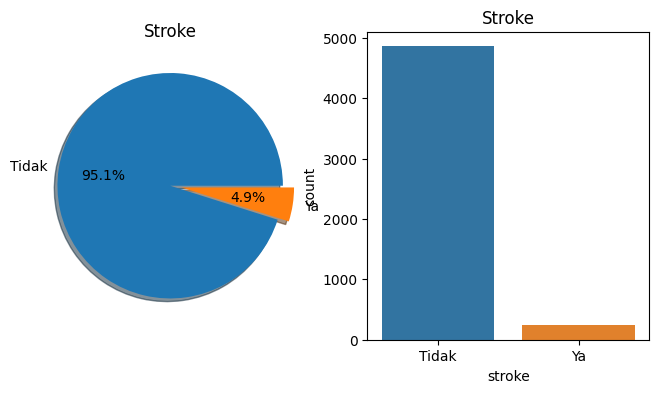

In [18]:
# Exploratory Data Analysis

f,ax=plt.subplots(1,2,figsize=(8,4))
data['stroke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Stroke')
ax[0].set_ylabel('')
sns.countplot(x = 'stroke',
              data = data,
              order = data['stroke'].value_counts().index)
ax[1].set_title('Stroke')
f.set_facecolor("white")
plt.show()

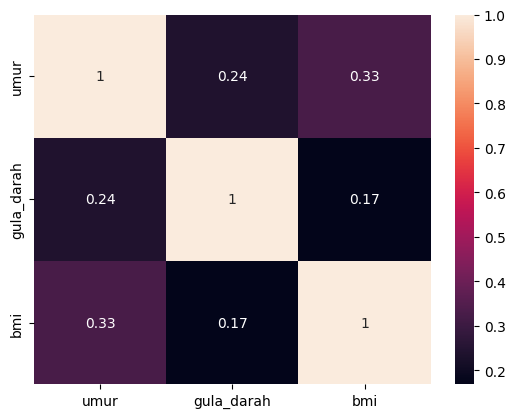

In [19]:
# Sekedar mengecek korelasi antara kolom/atribut yang bersifat numerik

sns.heatmap(data.corr(), annot=True)
plt.show()

In [20]:
# Melihat sebaran class, ternyata terdapat jumlah yang sangat 
# tidak seimbang antara class 'Ya' dan class 'Tidak'

data['stroke'].value_counts()

Tidak    4860
Ya        249
Name: stroke, dtype: int64

In [21]:
# Import modul untuk keperluan sampling ulang

from sklearn.utils import resample

In [22]:
# Memisahkan class yang mayoritas dan class yang minoritas
data_mayor = data[data.stroke=='Tidak']
data_minor = data[data.stroke=='Ya']
 
# Menaikkan data class minoritas sama dengan mayoritas
up_data_minor = resample(data_minor, 
                                 replace=True,     # sampel mengganti yang ada
                                 n_samples=4860,    # jumlah class mayoritas
                                 random_state=123) # produksi hasil
 
# Menggabung class mayor dan class minor
data_baru = pd.concat([data_mayor, up_data_minor])
 
# Menampilkan jumlah nilai setiap class pada data yang baru
data_baru.stroke.value_counts()

Tidak    4860
Ya       4860
Name: stroke, dtype: int64

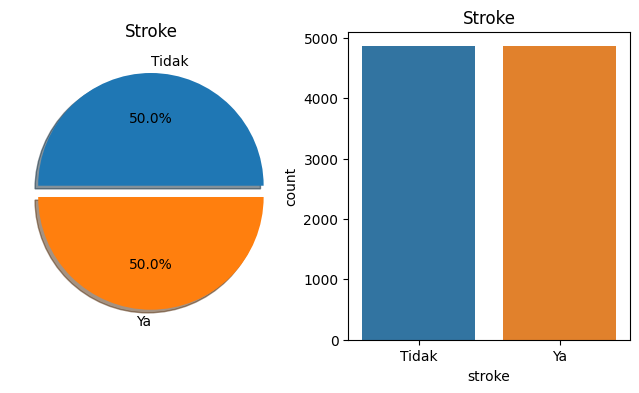

In [23]:
# Menampilkan sebaran class dalam bentuk grafis

f1,ax1=plt.subplots(1,2,figsize=(8,4))
data_baru['stroke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax1[0],shadow=True)
ax1[0].set_title('Stroke')
ax1[0].set_ylabel('')
sns.countplot(x = 'stroke',
              data = data_baru,
              order = data_baru['stroke'].value_counts().index)
ax1[1].set_title('Stroke')
f1.set_facecolor("white")
plt.show()

In [24]:
# Karena terdapat banyak data bersifat kategorikal, maka ini harus ditangani dengan cara berikut
# Kolom yang bersifat kategorikal akan di-encode. Saya memilih menggunakan Catboost untuk klasifikasi.
# Sehingga kolom-kolom tersebut harus dimasukkan dalam catFeatures.

cat_features = [0,2,3,4,5,6,9]

In [25]:
# Memisahkan data menjadi X (input) dan y (label/class)

X = data_baru.drop(["stroke"], axis=1)
y = data_baru["stroke"]

In [26]:
# Membagi data menjadi train dan test
# Untuk test_size disetting 0.2 karena data relatif besar

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_test

,jenis_kelamin,umur,tekanan_darah_tinggi,penyakit_jantung,pernah_menikah,pekerjaan,tempat_tinggal,gula_darah,bmi,merokok
500,Perempuan,56.00,Tidak,Tidak,Ya,Swasta,Perkotaan,77.49,36.00000,Dulu
51,Laki-laki,78.00,Ya,Tidak,Ya,Swasta,Perkotaan,75.32,28.89456,Dulu
3715,Perempuan,1.88,Tidak,Tidak,Tidak,Anak-anak,Pedesaan,100.74,18.60000,Tidak Tahu
3004,Perempuan,10.00,Tidak,Tidak,Tidak,Anak-anak,Pedesaan,93.29,20.60000,Tidak Tahu
215,Perempuan,79.00,Tidak,Ya,Tidak,Swasta,Perkotaan,205.33,31.00000,Ya
...,...,...,...,...,...,...,...,...,...,...
97,Laki-laki,58.00,Tidak,Ya,Ya,Swasta,Pedesaan,240.59,31.40000,Ya
13,Laki-laki,78.00,Tidak,Ya,Ya,Swasta,Perkotaan,219.84,28.89456,Tidak Tahu
182,Perempuan,32.00,Tidak,Tidak,Ya,Swasta,Pedesaan,76.13,29.90000,Ya
1810,Perempuan,78.00,Tidak,Ya,Ya,Wiraswasta,Pedesaan,88.90,34.30000,Tidak Tahu


In [28]:
y_test

500     Tidak
51         Ya
3715    Tidak
3004    Tidak
215        Ya
        ...  
97         Ya
13         Ya
182        Ya
1810    Tidak
3321    Tidak
Name: stroke, Length: 1944, dtype: object

In [29]:
# Import CatboostClassifier
# Saya memilih untuk menggunakan Catboost karena ini adalah algoritma yang paling baik menurut sebuah penelitian
# Dengan algoritma ini Saya dapat menggunakannya untuk klasifikasi.
# Memiliki kelebihan, mudah dan bagus untuk data yang bersifat kategorikal.
# Dengan setting default, algoritma ini sudah cukup mumpuni untuk melakukan klasifikasi

from catboost import CatBoostClassifier
clf = CatBoostClassifier()

# Setting fitur yang bersifat kategorikal dengan variable cat_features.
clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_test, y_test), 
        verbose=False
)
print('Model CatBoost sudah siap : ' + str(clf.is_fitted()))

# Prediksi pada data test
y_pred = clf.predict(X_test)

Model CatBoost sudah siap : True


In [30]:
# Import accuracy_score dari modul sklearn.metrics untuk menghitung akurasi model
# Digunakan accuracy_score karena paling sering dipakai untuk mengukur nilai akurasi

from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print("Akurasi : ", acc_score)

Akurasi :  0.9722222222222222


[[938  54]
 [  0 952]]


Text(0.5, 427.9555555555555, 'Prediksi')

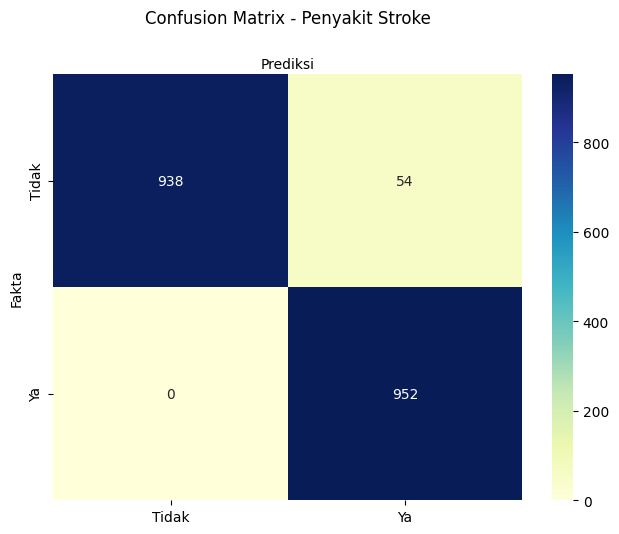

In [31]:
# Membuat COnfusion Matriks untuk melihat dengan jelas hasil tes model
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

class_names=['Tidak','Ya'] # nama class
fig, ax = plt.subplots()

# Membuat heatmap dengan seaborn dan matplotlib untuk menampilkan Cunfusion Matriks secara grafis
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
fig.set_facecolor("white")
plt.tight_layout()
plt.title('Confusion Matrix - Penyakit Stroke', y=1.1)
plt.ylabel('Fakta')
plt.xlabel('Prediksi')

In [32]:
# Menyimpan model menjadi sebuah file pikle yang dapat digunakan untuk deployment menjadi sebuah aplikasi

pd.to_pickle(clf,'model-arif.pkl')